In [91]:
import datetime as dt
from pandas_datareader import data
import numpy
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

dataset_raw = data.DataReader('BTC-USD','yahoo', dt.datetime(2014,9,16), dt.datetime.now())
dataset_raw.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,21056800.0,457.334015
2014-09-17,456.859985,413.104004,456.859985,424.440002,34483200.0,424.440002
2014-09-18,427.834991,384.532013,424.102997,394.795990,37919700.0,394.795990
2014-09-19,423.295990,389.882996,394.673004,408.903992,36863600.0,408.903992
2014-09-20,412.425995,393.181000,408.084991,398.821014,26580100.0,398.821014


In [92]:
dataset_raw1 = data.DataReader('^GSPC','yahoo', dt.datetime(2014,9,16), dt.datetime.now())
dataset_raw1.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,2002.280029,1979.060059,1981.930054,1998.979980,3160310000,1998.979980
2014-09-17,2010.739990,1993.290039,1999.300049,2001.569946,3209420000,2001.569946
2014-09-18,2012.339966,2003.069946,2003.069946,2011.359985,3235340000,2011.359985
2014-09-19,2019.260010,2006.589966,2012.739990,2010.400024,4880220000,2010.400024
2014-09-22,2009.079956,1991.010010,2009.079956,1994.290039,3349670000,1994.290039


In [93]:
dataset_raw2 = data.DataReader('USD','yahoo', dt.datetime(2014,9,16), dt.datetime.now())
dataset_raw2.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,14.011667,13.378333,13.378333,14.000000,31800.0,13.471940
2014-09-17,14.296667,14.045000,14.093333,14.148333,45000.0,13.614678
2014-09-18,14.458333,14.166667,14.321667,14.458333,43200.0,13.912984
2014-09-19,14.503333,14.133333,14.500000,14.213333,31200.0,13.677226
2014-09-22,14.186667,13.793333,14.186667,13.858333,37800.0,13.335614


In [94]:
dataset_raw22 = dataset_raw2 [["Close"]] 
dataset_raw22.head()

,Close
Date,
2014-09-16,14.000000
2014-09-17,14.148333
2014-09-18,14.458333
2014-09-19,14.213333
2014-09-22,13.858333


In [95]:
dataset_raw3 = data.DataReader('ETH-USD','yahoo', dt.datetime(2014,9,16), dt.datetime.now())
dataset_raw3.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-08-06,3.536610,2.521120,2.831620,2.772120,164329.0,2.772120
2015-08-07,2.798810,0.714725,2.793760,0.753325,674188.0,0.753325
2015-08-08,0.879810,0.629191,0.706136,0.701897,532170.0,0.701897
2015-08-09,0.729854,0.636546,0.713989,0.708448,405283.0,0.708448
2015-08-10,1.131410,0.663235,0.708087,1.067860,1463100.0,1.067860


In [96]:
dataset_raw33 = dataset_raw3 [["Close"]] 
dataset_raw33.head()

,Close
Date,
2015-08-06,2.772120
2015-08-07,0.753325
2015-08-08,0.701897
2015-08-09,0.708448
2015-08-10,1.067860


In [97]:
dataset_raw4 = data.DataReader('GOOGL','yahoo', dt.datetime(2014,9,16), dt.datetime.now())
dataset_raw4.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,590.150024,580.950012,580.950012,588.780029,1579600,588.780029
2014-09-17,596.070007,587.119995,589.510010,593.289978,1719500,593.289978
2014-09-18,597.559998,593.020020,595.049988,597.270020,1494500,597.270020
2014-09-19,605.400024,597.760010,599.489990,605.400024,4191600,605.400024
2014-09-22,603.799988,593.119995,602.500000,597.270020,1782200,597.270020


In [98]:
dataset_raw44 = dataset_raw4 [["Close"]] 
dataset_raw44.head()

,Close
Date,
2014-09-16,588.780029
2014-09-17,593.289978
2014-09-18,597.270020
2014-09-19,605.400024
2014-09-22,597.270020


In [99]:
dfm2= pd.merge(dataset_raw22,dataset_raw33, on= "Date", how="outer")
#dfm= pd.merge(dfo,dfo1, on= "Date", how="outer")
dfm2.head()

,Close_x,Close_y
Date,,
2014-09-16,14.000000,NaN
2014-09-17,14.148333,NaN
2014-09-18,14.458333,NaN
2014-09-19,14.213333,NaN
2014-09-22,13.858333,NaN


In [100]:
dfm3= pd.merge(dfm2,dataset_raw44, on= "Date", how="outer")
#dfm= pd.merge(dfo,dfo1, on= "Date", how="outer")
dfm3.head()

,Close_x,Close_y,Close
Date,,,
2014-09-16,14.000000,NaN,588.780029
2014-09-17,14.148333,NaN,593.289978
2014-09-18,14.458333,NaN,597.270020
2014-09-19,14.213333,NaN,605.400024
2014-09-22,13.858333,NaN,597.270020


In [101]:
dfm3.columns = ['Close_usd', "Close_eth","Close_googl"]
dfm3.head()

,Close_usd,Close_eth,Close_googl
Date,,,
2014-09-16,14.000000,NaN,588.780029
2014-09-17,14.148333,NaN,593.289978
2014-09-18,14.458333,NaN,597.270020
2014-09-19,14.213333,NaN,605.400024
2014-09-22,13.858333,NaN,597.270020


In [102]:
#dataset_raw1.isnull().sum()

In [103]:
dfm= pd.merge(dataset_raw,dataset_raw1, on= "Date", how="outer")
#dfm= pd.merge(dfo,dfo1, on= "Date", how="outer")
dfm.head()

,High_x,Low_x,Open_x,Close_x,Volume_x,Adj Close_x,High_y,Low_y,Open_y,Close_y,Volume_y,Adj Close_y
Date,,,,,,,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,21056800.0,457.334015,2002.280029,1979.060059,1981.930054,1998.979980,3.160310e+09,1998.979980
2014-09-17,456.859985,413.104004,456.859985,424.440002,34483200.0,424.440002,2010.739990,1993.290039,1999.300049,2001.569946,3.209420e+09,2001.569946
2014-09-18,427.834991,384.532013,424.102997,394.795990,37919700.0,394.795990,2012.339966,2003.069946,2003.069946,2011.359985,3.235340e+09,2011.359985
2014-09-19,423.295990,389.882996,394.673004,408.903992,36863600.0,408.903992,2019.260010,2006.589966,2012.739990,2010.400024,4.880220e+09,2010.400024
2014-09-20,412.425995,393.181000,408.084991,398.821014,26580100.0,398.821014,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
# Esto completa columnas NAN con el valor previo
dfm1 = dfm.fillna(method='pad')

In [105]:
dfm1.head()

,High_x,Low_x,Open_x,Close_x,Volume_x,Adj Close_x,High_y,Low_y,Open_y,Close_y,Volume_y,Adj Close_y
Date,,,,,,,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,21056800.0,457.334015,2002.280029,1979.060059,1981.930054,1998.979980,3.160310e+09,1998.979980
2014-09-17,456.859985,413.104004,456.859985,424.440002,34483200.0,424.440002,2010.739990,1993.290039,1999.300049,2001.569946,3.209420e+09,2001.569946
2014-09-18,427.834991,384.532013,424.102997,394.795990,37919700.0,394.795990,2012.339966,2003.069946,2003.069946,2011.359985,3.235340e+09,2011.359985
2014-09-19,423.295990,389.882996,394.673004,408.903992,36863600.0,408.903992,2019.260010,2006.589966,2012.739990,2010.400024,4.880220e+09,2010.400024
2014-09-20,412.425995,393.181000,408.084991,398.821014,26580100.0,398.821014,2019.260010,2006.589966,2012.739990,2010.400024,4.880220e+09,2010.400024


In [106]:
dataframe = dfm1[['Close_x', "Close_y","Adj Close_x"]]
dataframe.head()

,Close_x,Close_y,Adj Close_x
Date,,,
2014-09-16,457.334015,1998.979980,457.334015
2014-09-17,424.440002,2001.569946,424.440002
2014-09-18,394.795990,2011.359985,394.795990
2014-09-19,408.903992,2010.400024,408.903992
2014-09-20,398.821014,2010.400024,398.821014


In [107]:
dataframe.columns = ['Close_btc', "Close_sp","Close_target"]

In [108]:
dataframe1= pd.merge(dataframe,dfm3, on= "Date", how="outer")
#dfm= pd.merge(dfo,dfo1, on= "Date", how="outer")
dataframe1.head()

,Close_btc,Close_sp,Close_target,Close_usd,Close_eth,Close_googl
Date,,,,,,
2014-09-16,457.334015,1998.979980,457.334015,14.000000,NaN,588.780029
2014-09-17,424.440002,2001.569946,424.440002,14.148333,NaN,593.289978
2014-09-18,394.795990,2011.359985,394.795990,14.458333,NaN,597.270020
2014-09-19,408.903992,2010.400024,408.903992,14.213333,NaN,605.400024
2014-09-20,398.821014,2010.400024,398.821014,NaN,NaN,NaN


In [109]:
dataframe = dataframe1[['Close_btc', "Close_sp", "Close_usd", "Close_eth", "Close_googl", "Close_target"]]
#dataframe1.columns = ['Close_btc', "Close_gld","Close_target", "Close_usd", "Close_oil", "Close_googl"]

In [110]:
dataframe.head()

,Close_btc,Close_sp,Close_usd,Close_eth,Close_googl,Close_target
Date,,,,,,
2014-09-16,457.334015,1998.979980,14.000000,NaN,588.780029,457.334015
2014-09-17,424.440002,2001.569946,14.148333,NaN,593.289978,424.440002
2014-09-18,394.795990,2011.359985,14.458333,NaN,597.270020,394.795990
2014-09-19,408.903992,2010.400024,14.213333,NaN,605.400024,408.903992
2014-09-20,398.821014,2010.400024,NaN,NaN,NaN,398.821014


In [111]:
# Esto completa columnas NAN con el valor previo
dataframe = dataframe.fillna(method='pad')

In [112]:
dataframe.head()

,Close_btc,Close_sp,Close_usd,Close_eth,Close_googl,Close_target
Date,,,,,,
2014-09-16,457.334015,1998.979980,14.000000,NaN,588.780029,457.334015
2014-09-17,424.440002,2001.569946,14.148333,NaN,593.289978,424.440002
2014-09-18,394.795990,2011.359985,14.458333,NaN,597.270020,394.795990
2014-09-19,408.903992,2010.400024,14.213333,NaN,605.400024,408.903992
2014-09-20,398.821014,2010.400024,14.213333,NaN,605.400024,398.821014


In [113]:
# Esto completa columnas NAN con el valor posterior
dataframe = dataframe.fillna(method='bfill')

In [114]:
dataframe.head()

,Close_btc,Close_sp,Close_usd,Close_eth,Close_googl,Close_target
Date,,,,,,
2014-09-16,457.334015,1998.979980,14.000000,2.77212,588.780029,457.334015
2014-09-17,424.440002,2001.569946,14.148333,2.77212,593.289978,424.440002
2014-09-18,394.795990,2011.359985,14.458333,2.77212,597.270020,394.795990
2014-09-19,408.903992,2010.400024,14.213333,2.77212,605.400024,408.903992
2014-09-20,398.821014,2010.400024,14.213333,2.77212,605.400024,398.821014


In [115]:
#dataframe.values[0, :-1]
dataframe.values[0 , :-1]

array([ 457.33401489, 1998.97998047,   14.        ,    2.77212   ,
        588.7800293 ])

In [116]:
dataframe.values[4, -1]
#dataframe.values[0 , :-1]

398.8210144042969

In [117]:
numpy.append(dataframe.values[0 , :-1], dataframe.values[1, -1])
#numpy.append(dataset_raw.values[0, :-1], dataset_raw.values[1, -1])

array([ 457.33401489, 1998.97998047,   14.        ,    2.77212   ,
        588.7800293 ,  424.44000244])

In [118]:
len(dataframe)

2430

In [125]:

def create_dataset(dataset):
    data = []
    for i in range(len(dataset)-5):
        data.append(numpy.append(dataframe.values[i, :-1], dataframe.values[i+5, -1]))
    return numpy.array(data)

data = create_dataset(dataframe.values)
print(data[:10])
print(data.shape)

[[ 457.33401489 1998.97998047   14.            2.77212     588.7800293
   402.15200806]
 [ 424.44000244 2001.56994629   14.1483326     2.77212     593.28997803
   435.79098511]
 [ 394.79598999 2011.35998535   14.45833302    2.77212     597.27001953
   423.20498657]
 [ 408.9039917  2010.40002441   14.21333313    2.77212     605.40002441
   411.57400513]
 [ 398.8210144  2010.40002441   14.21333313    2.77212     605.40002441
   404.42498779]
 [ 402.15200806 2010.40002441   14.21333313    2.77212     605.40002441
   399.51998901]
 [ 435.79098511 1994.29003906   13.85833263    2.77212     597.27001953
   377.18099976]
 [ 423.20498657 1982.77001953   13.78833294    2.77212     591.17999268
   375.4670105 ]
 [ 411.57400513 1998.30004883   14.05000019    2.77212     598.41998291
   386.94400024]
 [ 404.42498779 1965.98999023   13.57166672    2.77212     585.25
   383.61499023]]
(2425, 6)


In [141]:
# forecast Bitcoin price
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
from matplotlib import pyplot
import numpy as np
from tqdm import tqdm

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX, n_estimators):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = XGBRegressor(objective='reg:squarederror', n_estimators=n_estimators)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict(asarray([testX]))
	return yhat[0], model

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, n_estimators=10):
    predictions = list()
    models = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in tqdm(range(len(test))):
        # split test row into input and output columns
        testX, testy = test[i, :-1], test[i, -1]
        # fit model on history and make a prediction
        yhat, model = xgboost_forecast(history, testX, n_estimators)
        # store forecast in list of predictions
        predictions.append(yhat)
        models.append(model)
        # add actual observation to history for the next loop
        history.append(test[i])
        # summarize progress
        # print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
    # estimate prediction error
    error = r2_score(test[:, -1], predictions)
    #errortrain= r2_score(train[:, -1], predictions)
    return error, test[:, -1], predictions, models

  0%|          | 0/2000 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +
100%|██████████| 2000/2000 [01:24<00:00, 23.81it/s]


r2: 0.991


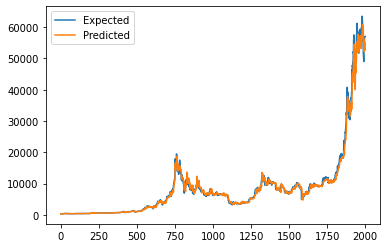

In [142]:
r2_score, y, yhat, models = walk_forward_validation(data, n_test=2000, n_estimators=50)
print('r2: %.3f' % r2_score)
#print('r2: %.3f' % errortrain)

# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

In [143]:
y

array([  326.92700195,   324.53601074,   323.04598999, ...,
       57024.98828125, 57024.98828125, 57024.98828125])

In [144]:
yhat[-1]

54948.33

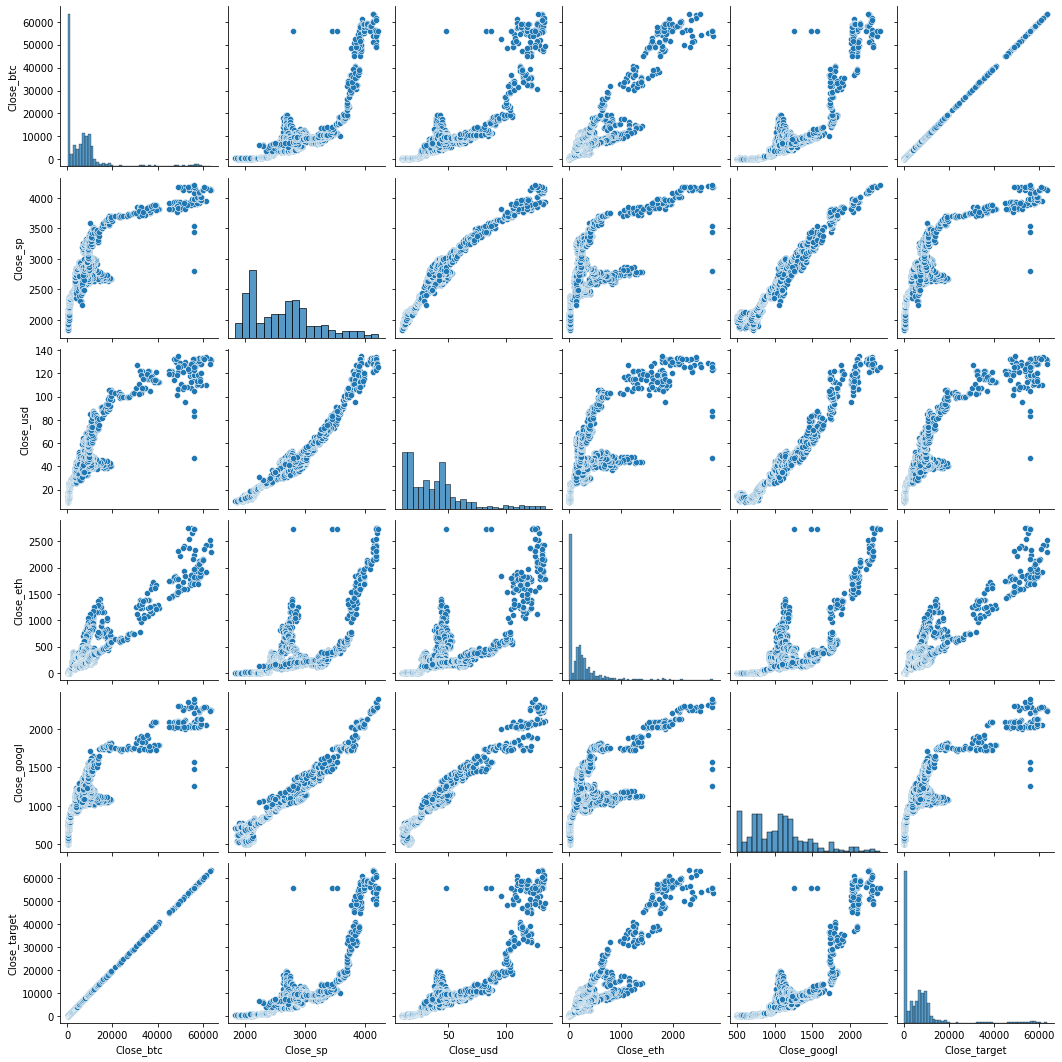

In [72]:
import seaborn as sns
sns.pairplot(dataframe)

In [73]:
cols = dataframe.columns[:-1]
imps = numpy.stack([m.feature_importances_ for m in models])

In [74]:
imps.shape

(2000, 5)

In [75]:
feature_importances = DataFrame(imps, columns=cols)
# feature_importances = feature_importances.sort_values(by='imp',ascending=False)
# px.bar(feature_importances,x='col',y='imp')
feature_importances.describe()

,Close_btc,Close_sp,Close_usd,Close_eth,Close_googl
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.777884,0.045969,0.112796,0.030553,0.032798
std,0.309411,0.096109,0.221465,0.100459,0.052059
min,0.065348,0.000656,0.001308,0.000000,0.000000
25%,0.733711,0.004148,0.004461,0.003789,0.004779
50%,0.956866,0.005542,0.006587,0.006572,0.010241
75%,0.976025,0.042453,0.060543,0.015331,0.035061
max,0.989202,0.705943,0.796969,0.838109,0.465631
